In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt



plt.style.use('ggplot')

In [2]:
orders = pd.read_excel('boot.xlsx')

In [3]:
orders

,user_id,revenue
0,3428,1085.327464
1,3184,1085.654927
2,2393,1087.619709
3,1766,1088.438368
4,1093,1092.040468
...,...,...
4225,3324,6446.561632
4226,1683,6447.380291
4227,959,6447.707755
4228,504,6449.017609


In [5]:
boot_it = 2000 # кол-во выборок 
boot_data = [] # ПУСТОЙ СПИСОК В КОТОРЫЙ БУДЕТ ЗАПИСЫВАТЬСЯ ЗНАЧЕНИЕ НУЖНого НАМ ПОКАЗАТЕЛя
boot_conf_level = 0.95
for i in range(boot_it):
    samples = orders['revenue'].sample(len(orders['revenue']), replace = True) #sample выбрачть случайным образом, len - длина ( в нашем случае 4230)
    boot_data.append(np.mean(samples))



print(f'Original: {np.mean(orders["revenue"])}, Boot: {np.mean(boot_data)}')

Original: 3740.3890325351117, Boot: 3740.1633890146422


In [6]:
# Найдем доверительный интервал
left_ci = (1 - boot_conf_level)/2
right_ci = 1 - (1 - boot_conf_level) / 2
ci = pd.Series(boot_data).quantile([left_ci, right_ci])



print(ci)

0.025    3695.477498
0.975    3783.966596
dtype: float64


In [7]:
np.percentile(boot_data, 2.5)

3695.4774975828695

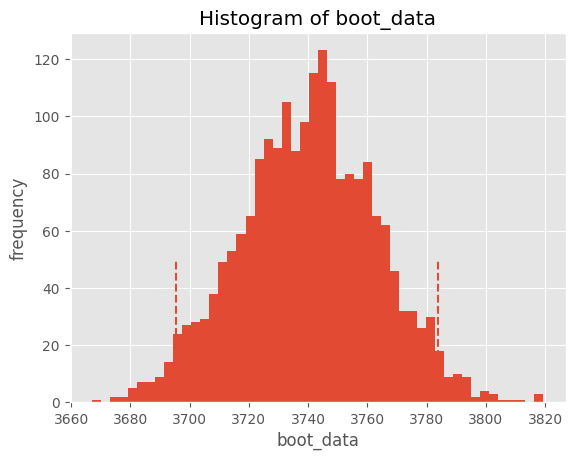

In [10]:
plt.hist(pd.Series(boot_data), bins = 50)
plt.style.use('ggplot')
plt.vlines(ci,ymin=0,ymax=50,linestyle='--')
plt.xlabel('boot_data')
plt.ylabel('frequency')
plt.title("Histogram of boot_data")
plt.show()

In [9]:
!pip install bootstrapped

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'C:\Program Files\Python39\python.exe -m pip install --upgrade pip' command.


  Created wheel for bootstrapped: filename=bootstrapped-0.0.2-py2.py3-none-any.whl size=13992 sha256=bcdd45f7e53bbf85421e45c9f238e85aa5884a81d36ce260b6b8575431bc2b5c
  Stored in directory: c:\users\st\appdata\local\pip\cache\wheels\a9\7b\e9\000ad8cb18a35a7d68051b362c96a867cd24b7b0c7b478329d
Successfully built bootstrapped
